<a href="https://colab.research.google.com/github/strawndri/slaviero-suct-data-analysis/blob/main/Notebooks/analise_estornos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<font size=20> Análise de Dados: Estornos </font>

---




Notebook para analisar os estornos mensais do hotel Slaviero Essential Curitiba Shopping. As variáveis em análise são:

* **Valor**: valor, em reais, do que foi estornado (crédito ou débito);
* **Data**: período dia/mês/ano em que o estorno foi realizado;
* **Hora**: em qual horário do dia o estorno foi realizado. Utiliza-se o padrão de 12 horas;
* **Usuário**: qual funcionário do SUCT realizou o estorno;
* **Motivo**: jusiticativa do estorno.


# 1. Importações


---



## 1.1 Bibliotecas

- Pandas: https://pandas.pydata.org/docs/user_guide/index.html#user-guide
- Matplotlib: https://matplotlib.org/stable/index.html
- Seaborn: https://seaborn.pydata.org/

In [205]:
import pandas as pd

In [206]:
import matplotlib.pyplot as plt

In [207]:
!pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
import datetime

## 1.2 Bases de Dados

### Janeiro

In [209]:
dataset_janeiro = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_janeiro.csv')
dataset_janeiro.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde.,Motivo
0,405,55784666,168.63,1/1/2022,10:53:11 AM,CFIOR,1,ERRO DE LANÇAMENTO
1,511,55849601,-240.00,1/1/2022,12:18:41 PM,CFIOR,1,VALOR LANÇADO INCORRET
2,805,55512062,-291.90,1/1/2022,11:17:00 AM,CFIOR,1,ERRO DE LANÇAMENTO
3,805,55512062,-7.27,1/1/2022,11:17:00 AM,CFIOR,1,ERRO DE LANÇAMENTO
4,805,55512062,-291.90,1/1/2022,11:17:00 AM,CFIOR,1,ERRO DE LANÇAMENTO


### Fevereiro

### Março

In [210]:
dataset_marco = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_marco.csv')
dataset_marco.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo
0,1011.0,56559615.0,-185.57,3/1/2022,02:05:00 AM,RFREITAS,1,ERRO DO SISTEMA
1,106.0,56752172.0,-1.25,3/1/2022,04:33:02 PM,FRIGOBAR.SUCT,1,ERRO DE LANÇAMENTO
2,106.0,56752172.0,-24.93,3/1/2022,04:33:02 PM,FRIGOBAR.SUCT,1,ERRO DE LANÇAMENTO
3,108.0,56679610.0,711.12,3/1/2022,01:42:06 AM,RFREITAS,1,Erro de Laçto
4,108.0,56679610.0,-0.01,3/1/2022,01:42:25 AM,RFREITAS,1,ERRO DO SISTEMA


### Abril

### Maio

In [211]:
dataset_maio = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_maio.csv')
dataset_maio.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo
0,107.0,57429723.0,-293.00,5/1/2022,10:04:21 AM,RFELIZ,1,ERRO DO SISTEMA
1,208.0,57825777.0,32.25,5/1/2022,1:48:40 AM,RFELIZ,1,ERRO DE LANÇAMENTO
2,510.0,57813205.0,-196.79,5/1/2022,12:14:57 PM,RFELIZ,1,ERRO DE LANÇAMENTO
3,502.0,57837422.0,-196.24,5/1/2022,11:24:00 PM,RFELIZ,1,ERRO DE LANÇAMENTO
4,510.0,57813205.0,-30.00,5/1/2022,12:13:47 PM,RFELIZ,1,ERRO DE LANÇAMENTO


### Junho

In [212]:
dataset_junho = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_junho.csv')
dataset_junho.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo,Unnamed: 8
0,1008.0,58380248.0,8.00,6/1/2022,12:00:33 PM,IGPESSOA,1,LCTO EM DUPLICIDADE,NaN
1,105.0,57936668.0,144.90,6/1/2022,7:28:51 PM,CALOLIVEIRA,1,Erro de Laçto,NaN
2,109.0,57850003.0,470.40,6/1/2022,9:02:50 AM,LPADOVINO,1,Erro de Laçto,NaN
3,205.0,58380973.0,-5.00,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT,NaN
4,205.0,58380973.0,-3.94,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT,NaN


### Lista de bases de dados
Foi optado pela criação de duas listas, uma contendo somente o nome dos meses e outra com os respectivos dataframes, a fim de atingir uma melhor compreensão.

In [213]:
meses = ['Janeiro', 'Março', 'Maio', 'Junho']

In [214]:
datasets = [dataset_janeiro, dataset_marco, dataset_maio, dataset_junho]

# 2. Tratamento de Dados


---



## 2.1 Removendo colunas com valores NaN

*Obs.: NaN (Not a Number) representa valores que foram perdidos e que não são apresentados na base de dados.*

> Os dados não preenchidos na coluna de *UH (Unidade Hoteleira)* referem-se aos estornos de valores que não estão associados diretamente a um hóspede. Por exemplo: é possível haver estornos de "café passante", categoria de indíviduos que não se hospedam no hotel, mas consomem deste.



In [215]:
dataset_junho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UH          467 non-null    float64
 1   Reserva     466 non-null    float64
 2   Valor       496 non-null    float64
 3   Data        496 non-null    object 
 4   Hora        496 non-null    object 
 5   Usuário     496 non-null    object 
 6   Qtde        496 non-null    int64  
 7   Motivo      496 non-null    object 
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(4), int64(1), object(4)
memory usage: 35.0+ KB


Nota-se que a última coluna "Unnamed" veio, provavelmente, de algum erro na formação da tabela.

Todos as linhas dessa coluna são NaN e, portanto, devem ser removidos.

In [216]:
dataset_junho.drop(columns = ['Unnamed: 8'], inplace = True)
dataset_junho.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo
0,1008.0,58380248.0,8.00,6/1/2022,12:00:33 PM,IGPESSOA,1,LCTO EM DUPLICIDADE
1,105.0,57936668.0,144.90,6/1/2022,7:28:51 PM,CALOLIVEIRA,1,Erro de Laçto
2,109.0,57850003.0,470.40,6/1/2022,9:02:50 AM,LPADOVINO,1,Erro de Laçto
3,205.0,58380973.0,-5.00,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT
4,205.0,58380973.0,-3.94,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT


## 2.2 Alterando os nomes das colunas

In [217]:
new_columns = {
    'UH': 'UH',	
    'Reserva': 'reserva',
    'Descrição': 'descricao',
    'Crédito': 'credito',
    'Débito': 'debito',
    'Valor': 'valor',
    'Data': 'data',
    'Hora': 'hora',
    'Usuário': 'usuario',
    'Qtde.': 'quantidade',
    'Qtde': 'quantidade',
    'Motivo': 'motivo'
}

for i in datasets:
  i.rename(columns = new_columns, inplace = True)

# 3. Funções e variáveis padronizadas

## 3.1 Paleta de cores para os gráficos

In [218]:
paleta_cores = ['#BC4D7C', '#853758', '#4E2A6A', '#6A5596', '#7285B5', '#93AECE', '#CDD9E8', '#8BBAB4', '#5AB4A8', '#276960', '#083630']

In [219]:
# paleta_cores = ['#022C30', '#194647', '#256669', '#2E8285', '#3EACB0', '#41B6BA', '#84D9E0', '#9ED7EC', '#D0E9FF']

## 3.2 Função genérica para criação de dataframes
Essa função será utilizada ao longo da análise para criar, na maioria das vezes, uma lista de dataframes, os quais servirão para a comparação dos dados de casa mês.

In [220]:
def gera_dataframe(colunas = {}):

  df_frequencia = pd.DataFrame(colunas)
  df_frequencia.reset_index()

  return df_frequencia

## 3.3 Determinação das configurações básicas para todos os gráficos

In [221]:
''' Definições utilizadas em todos os gráficos
- largura: largura do gráfico;
- altura: altura do gráfico;
- titulo: título principal do gráfico;
- ytitulo: posição y do título.
'''
def configurar_plot(largura, altura, titulo, ytitulo = 0.95):
  sns.set_style('darkgrid')
  plt.figure(figsize = (largura, altura))
  plt.suptitle(titulo, y = ytitulo, fontsize = 25, fontweight = 'bold')

## 3.4 Função que plota vários gráficos
Objetivo: apresentar n gráficos de uma única vez, a fim de que todos possam ser analisados em conjunto.

In [222]:
''' Função para criação de gráficos de barra
- tipo_grafico: determina qual será o formato do gráfico;
- x: eixo x do gráfico;
- y: eixo y do gráfico;
- xlabel: legenda do eixo x;
- ylabel: legenda do eixo y;
- titulo: título do gráfico;
- 
- data: dataset utilizado;
- hue: parâmetro extra relacionado aos eixos x e y.
'''

def comparar_graficos(
    tipo_grafico, x, y, xlabel, ylabel, 
    titulo, paleta = paleta_cores,
    data = [], hue = None):

  total = len(data)
  configurar_plot(24, 14, titulo, 1.05)

  for i, item in enumerate(data):

    if (i == 0):
      ax = plt.subplot(total, 2, i + 1)
    else:
      plt.subplot(total, 2, i + 1)
    
    plt.tight_layout(h_pad=4.0) # espaçamento entre os gráficos
    plt.title(meses[i], fontsize = 18)

    if (tipo_grafico == 'barplot'):
      ax = sns.barplot(x=x, y=y, palette=paleta, data=item, hue=hue)

    elif (tipo_grafico == 'lineplot'):
      ax = sns.lineplot(x=x, y=y, data=item, color = paleta, marker = 'o')

    elif (tipo_grafico == 'scatterplot'):
      ax = sns.scatterplot(x=x, y=y, data=item, hue=hue)

    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_ylabel(ylabel, fontsize = 14)

  ax

# 4. Análise de Dados

## 4.1 Quantidade de estornos por usuário

In [223]:
lista_dfs = []

In [224]:
for i, item in enumerate(datasets):

  frequencia = item['usuario'].value_counts()
  total_variaveis = item['usuario'].unique()

  df_frequencia = gera_dataframe({'usuario': total_variaveis, 'estornos': frequencia})
  lista_dfs.append(df_frequencia)


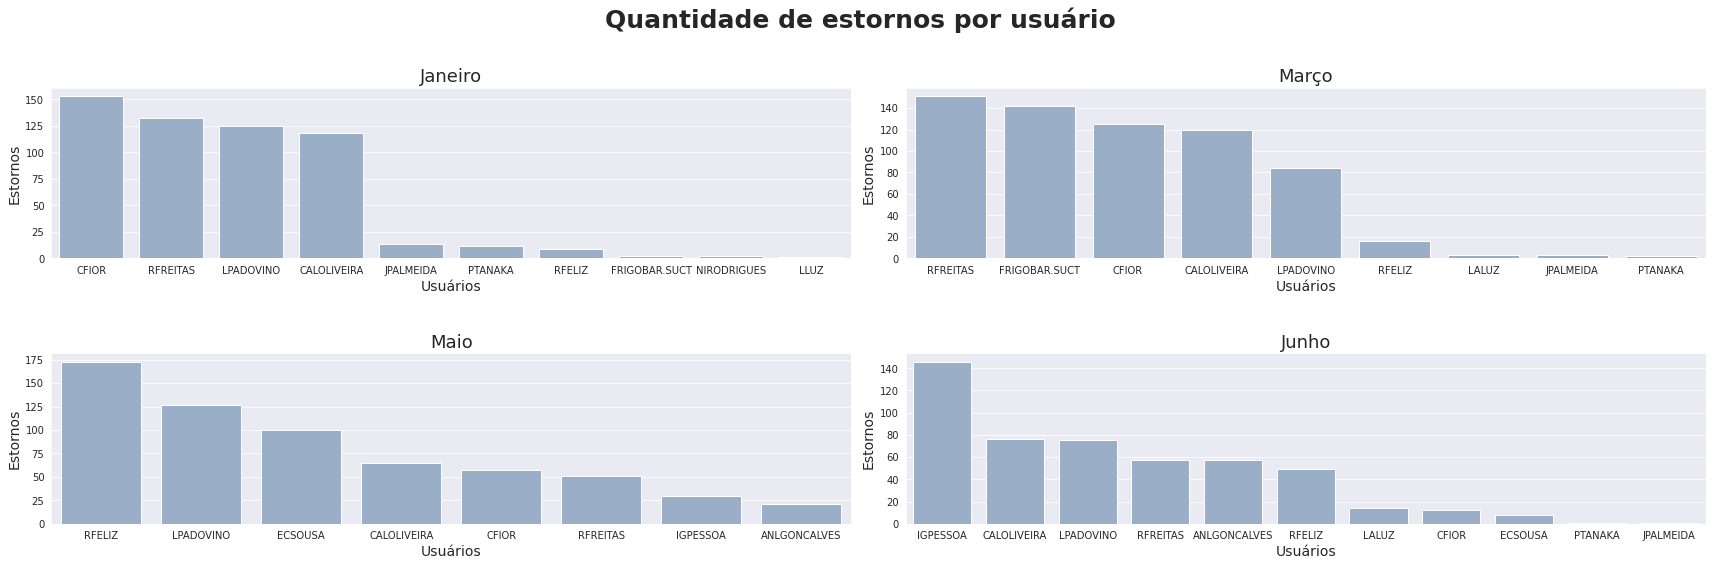

In [225]:
graphic = comparar_graficos(tipo_grafico='barplot', x='usuario', y='estornos', 
                      xlabel = 'Usuários', ylabel ='Estornos', 
                      titulo = 'Quantidade de estornos por usuário',
                      paleta = [paleta_cores[5]],
                      data = lista_dfs)
graphic

## 4.2 Quantidade de estornos diários

In [226]:
lista_dfs = []

In [227]:
for i, item in enumerate(datasets):

  quantidade = pd.value_counts(item['data'])
  dias = [i[2:-5] for i in item.data.unique()]

  df_frequencia = gera_dataframe({'dias': dias, 'estornos': quantidade})
  lista_dfs.append(df_frequencia)

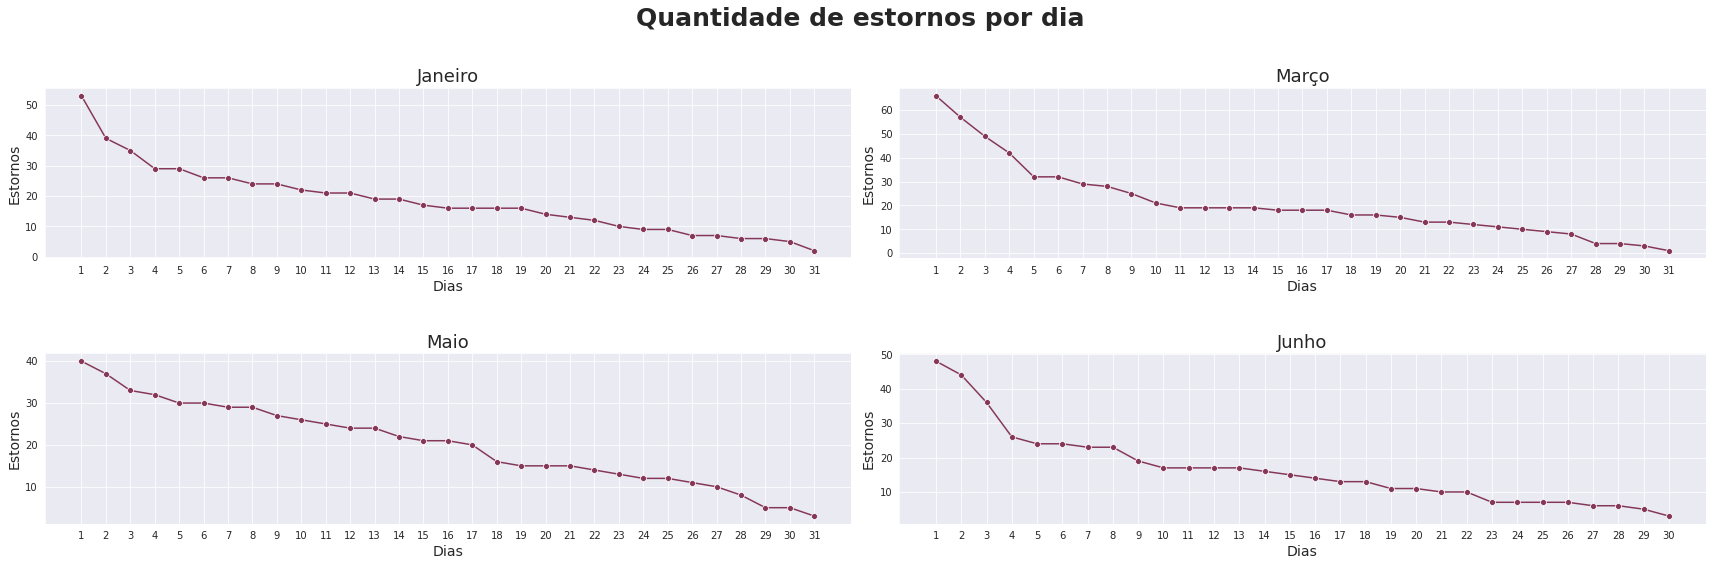

In [228]:
graphic = comparar_graficos(tipo_grafico='lineplot', x='dias', y='estornos', 
                      xlabel = 'Dias', ylabel ='Estornos', 
                      titulo = 'Quantidade de estornos por dia',
                      paleta = paleta_cores[1], data = lista_dfs)
graphic

## 4.3 Quantidade de estornos realizada por cada usuário (classificação)

In [229]:
lista_dfs = []

In [230]:
for i, item in enumerate(datasets):

  motivos_por_usuario = pd.crosstab(item['usuario'], item['motivo'])
  motivos_por_usuario = pd.DataFrame(motivos_por_usuario.stack().reset_index())
  motivos_por_usuario.rename(columns = {0: 'total'}, inplace = True)
  motivos_por_usuario.sort_values(by=['total'], ascending = False, inplace = True)

  lista_dfs.append(motivos_por_usuario)

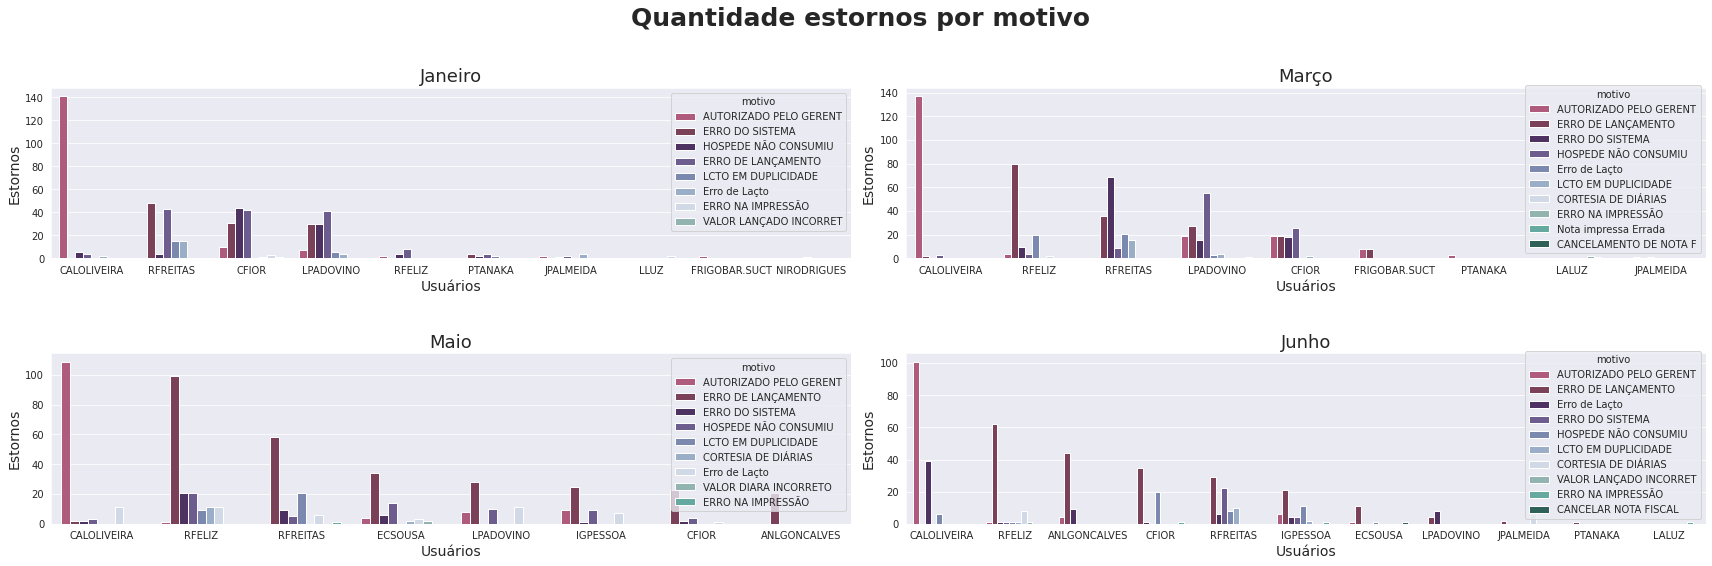

In [233]:
graphic = comparar_graficos(
    tipo_grafico='barplot', x='usuario', y='total',
    xlabel = 'Usuários', ylabel ='Estornos', 
    titulo = 'Quantidade estornos por motivo',
    paleta = paleta_cores,
    data = lista_dfs, hue = 'motivo')
graphic

## 4.4 Valor total de estornos por dia

In [235]:
lista_dfs = []

In [237]:
for i, item in enumerate(datasets):
  valor_por_dia = item.groupby(['data'])['valor'].sum()

  for i in range(0, len(valor_por_dia)):
    if valor_por_dia[i] <= 0:
      valor_por_dia[i] *= -1

  dias = [i[2:-5] for i in item.data.unique()]

  df_frequencia = gera_dataframe({'dias': dias, 'total': valor_por_dia})
  lista_dfs.append(df_frequencia)

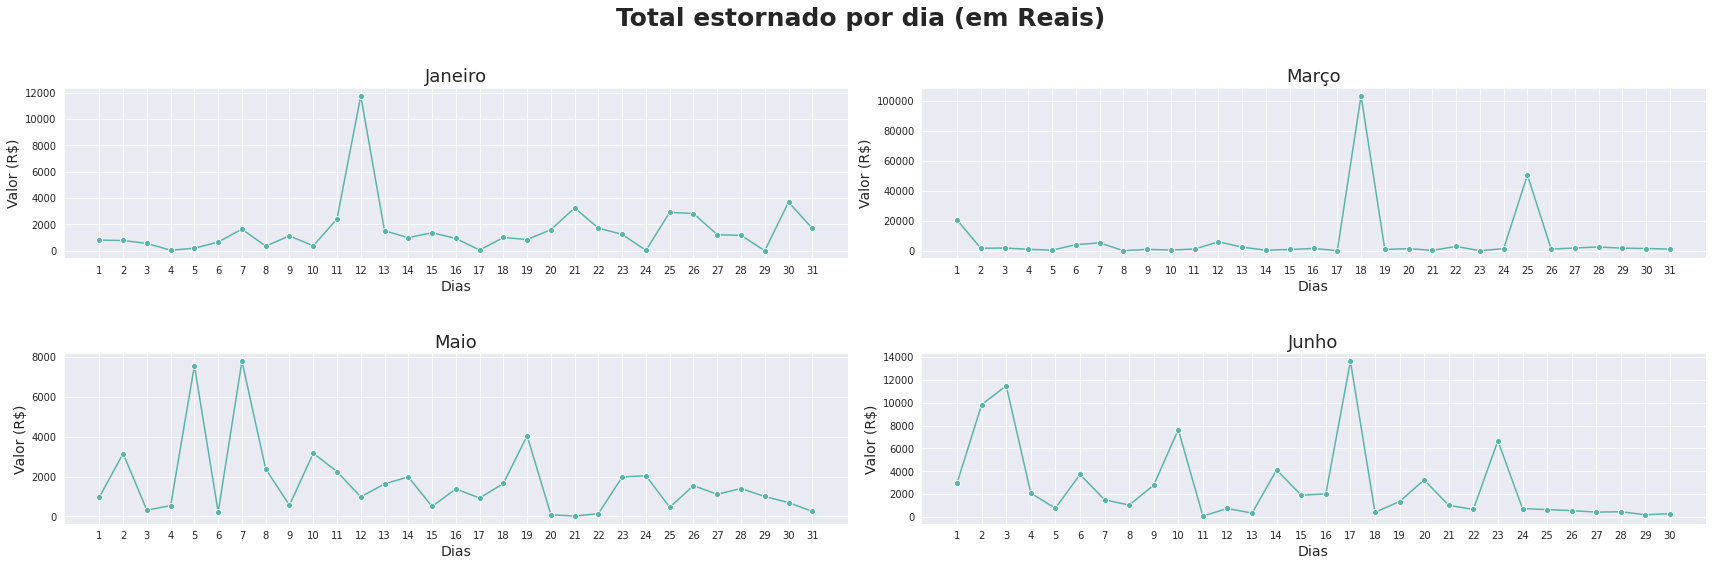

In [238]:
comparar_graficos(tipo_grafico = 'lineplot', x = 'dias', y = 'total',
                  xlabel = 'Dias', ylabel = 'Valor (R$)', 
                  titulo = 'Total estornado por dia (em Reais)',
                  paleta = paleta_cores[8],
                  data = lista_dfs)